In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from flask import Flask, render_template, request


In [88]:
# Load the climate dataset
df = pd.read_csv('data/climate_nasa.csv')

# Display first few rows
df.head()


date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   
3  2022-09-08T00:51:30.000Z           4   
4  2022-09-07T19:06:20.000Z          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
3  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            NaN   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...           26.0   

                                                text  
0  Neat comparison I have not heard it before.\n ...  
1  An excellent way to visualise the invisible! T...  
2  Does the CO2/ghg in the troposphere affect the...  
3  excellent post! I defo feel the difference - o...  
4  Yes, and carbon dioxide does not harm the Eart...

In [90]:
df['date']=pd.to_datetime(df['date'])

df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day


In [91]:
df.head()

date  likesCount  \
0 2022-09-07 17:12:32+00:00           2   
1 2022-09-08 14:51:13+00:00           0   
2 2022-09-07 17:19:41+00:00           1   
3 2022-09-08 00:51:30+00:00           4   
4 2022-09-07 19:06:20+00:00          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
3  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            NaN   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...           26.0   

                                                text  year  month  day  
0  Neat comparison I have not heard it before.\n ...  2022      9    7  
1  An excellent way to visualise the invisible! T...  2022      9    8  
2  Does the CO2/ghg in the troposphere affect the...  2022      9    7  
3  excellent post! I defo feel the difference - o...  2022      9    8  
4  Yes, and carbon dioxide does not harm the Eart...  2022      9    7

In [92]:
df.drop(columns=['date'])

likesCount                                        profileName  \
0             2  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...   
1             0  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...   
2             1  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...   
3             4  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...   
4            16  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...   
..          ...                                                ...   
517           0  9e17b1a6422032d47472f0216c73aafda7587e302eed5e...   
518           1  48e55d898603a136aefc44771f248bffd67242583a462a...   
519           3  ca5d2611814cf8c9844ed06d9916d876d2dba94dac5ff2...   
520           1  a87c8aea74c9b97002b368d6143ce9c2809dcaec3103fb...   
521          12  cc70f6c9dcc2637b1c5fd90046834612627c752b828cb4...   

     commentsCount                                               text  year  \
0              NaN  Neat comparison I have not heard it before.\n ...  2022   
1              NaN  An excellent way to visualise the invisible! T...  2022   
2              3.0  Does the CO2/ghg in the troposphere affect the...  2022   
3              NaN  excellent post! I defo feel the difference - o...  2022   
4             26.0  Yes, and carbon dioxide does not harm the Eart...  2022   
..             ...                                                ...   ...   
517            NaN                     One can only hope for a peak 😞  2022   
518            5.0  what is the error margin for the temperature e...  2022   
519            NaN  We all should volenteerly help in reducing Glo...  2022   
520            NaN                                       Sergio Yepes  2022   
521            1.0  We're experiencing severe, abnormal weather pa...  2022   

     month  day  
0        9    7  
1        9    8  
2        9    7  
3        9    8  
4        9    7  
..     ...  ...  
517     12   22  
518     12   22  
519     12   22  
520     12   22  
521     12   22  

[522 rows x 7 columns]

In [93]:
df['commentsCount'] = pd.to_numeric(df['commentsCount'], errors='coerce')

In [94]:
df.fillna({
    'commentsCount': df['commentsCount'].mean(),  
}, inplace=True)

In [95]:
df.head()

date  likesCount  \
0 2022-09-07 17:12:32+00:00           2   
1 2022-09-08 14:51:13+00:00           0   
2 2022-09-07 17:19:41+00:00           1   
3 2022-09-08 00:51:30+00:00           4   
4 2022-09-07 19:06:20+00:00          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...       8.696721   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...       8.696721   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...       3.000000   
3  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...       8.696721   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...      26.000000   

                                                text  year  month  day  
0  Neat comparison I have not heard it before.\n ...  2022      9    7  
1  An excellent way to visualise the invisible! T...  2022      9    8  
2  Does the CO2/ghg in the troposphere affect the...  2022      9    7  
3  excellent post! I defo feel the difference - o...  2022      9    8  
4  Yes, and carbon dioxide does not harm the Eart...  2022      9    7

In [96]:
df['profileName'] = pd.to_numeric(df['profileName'], errors='coerce')
df.fillna({
    'profileName': df['profileName'].mean(),  
}, inplace=True)

In [97]:
df.head()

date  likesCount  profileName  commentsCount  \
0 2022-09-07 17:12:32+00:00           2          NaN       8.696721   
1 2022-09-08 14:51:13+00:00           0          NaN       8.696721   
2 2022-09-07 17:19:41+00:00           1          NaN       3.000000   
3 2022-09-08 00:51:30+00:00           4          NaN       8.696721   
4 2022-09-07 19:06:20+00:00          16          NaN      26.000000   

                                                text  year  month  day  
0  Neat comparison I have not heard it before.\n ...  2022      9    7  
1  An excellent way to visualise the invisible! T...  2022      9    8  
2  Does the CO2/ghg in the troposphere affect the...  2022      9    7  
3  excellent post! I defo feel the difference - o...  2022      9    8  
4  Yes, and carbon dioxide does not harm the Eart...  2022      9    7

In [103]:
# Step 1: Fill missing values in the text column
df['text'] = df['text'].fillna('')  # Fill NaN with an empty string

# Step 2: Convert all entries in the text column to strings
df['text'] = df['text'].astype(str)




In [105]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to preprocess comments
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char.isalpha() or char == ' '])  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply preprocessing to comments column
df['processed_text'] = df['text'].apply(preprocess_text)

# Use TF-IDF Vectorizer to convert text into features
vectorizer = TfidfVectorizer(max_features=1000)
X_text = vectorizer.fit_transform(df['processed_text']).toarray()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\APPLE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
df.head()

date  likesCount  profileName  commentsCount  \
0 2022-09-07 17:12:32+00:00           2          NaN       8.696721   
1 2022-09-08 14:51:13+00:00           0          NaN       8.696721   
2 2022-09-07 17:19:41+00:00           1          NaN       3.000000   
3 2022-09-08 00:51:30+00:00           4          NaN       8.696721   
4 2022-09-07 19:06:20+00:00          16          NaN      26.000000   

                                                text  year  month  day  \
0  Neat comparison I have not heard it before.\n ...  2022      9    7   
1  An excellent way to visualise the invisible! T...  2022      9    8   
2  Does the CO2/ghg in the troposphere affect the...  2022      9    7   
3  excellent post! I defo feel the difference - o...  2022      9    8   
4  Yes, and carbon dioxide does not harm the Eart...  2022      9    7   

                                      processed_text  
0  neat comparison heard would say co like disco ...  
1           excellent way visualise invisible thanks  
2  coghg troposphere affect stratosphere warmer t...  
3  excellent post defo feel difference one drink ...  
4  yes carbon dioxide harm earth like people maki...

In [107]:
# Drop irrelevant columns and prepare climate-related features
X_climate = df.drop(columns=['text', 'processed_text', 'commentsCount'])

In [108]:
X_climate.head()

date  likesCount  profileName  year  month  day
0 2022-09-07 17:12:32+00:00           2          NaN  2022      9    7
1 2022-09-08 14:51:13+00:00           0          NaN  2022      9    8
2 2022-09-07 17:19:41+00:00           1          NaN  2022      9    7
3 2022-09-08 00:51:30+00:00           4          NaN  2022      9    8
4 2022-09-07 19:06:20+00:00          16          NaN  2022      9    7

In [113]:
X_climate.drop(columns=['date'])

likesCount  profileName  year  month  day
0             2          NaN  2022      9    7
1             0          NaN  2022      9    8
2             1          NaN  2022      9    7
3             4          NaN  2022      9    8
4            16          NaN  2022      9    7
..          ...          ...   ...    ...  ...
517           0          NaN  2022     12   22
518           1          NaN  2022     12   22
519           3          NaN  2022     12   22
520           1          NaN  2022     12   22
521          12          NaN  2022     12   22

[522 rows x 5 columns]

In [115]:
# Drop 'profileName' as it's not numeric and should not be included in scaling
X_climate = X_climate.drop(columns=['profileName'], errors='ignore')

In [118]:
X_climate.head()

likesCount  year  month  day
0           2  2022      9    7
1           0  2022      9    8
2           1  2022      9    7
3           4  2022      9    8
4          16  2022      9    7

In [117]:
X_climate = X_climate.drop(columns=['date'], errors='ignore')

In [119]:
X_climate.head()

likesCount  year  month  day
0           2  2022      9    7
1           0  2022      9    8
2           1  2022      9    7
3           4  2022      9    8
4          16  2022      9    7

In [120]:
# Standardize numerical features
scaler = StandardScaler()
X_climate_scaled = scaler.fit_transform(X_climate)

In [121]:
# Combine textual and climate features
X_combined = np.hstack((X_climate_scaled, X_text))

In [125]:
# Target variable (e.g., temperature anomaly)
y = df['likesCount']


In [126]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [134]:
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data

# Now transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

In [135]:
# Model Selection and Training (Random Forest and Logistic Regression for Text)
# Random Forest for climate data
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Logistic Regression for sentiment analysis of comments
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Make predictions on climate test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MAE: {mae_rf}, MSE: {mse_rf}, R2: {r2_rf}')



Random Forest MAE: 0.6017142857142858, MSE: 29.130784761904756, R2: 0.8378657347529117


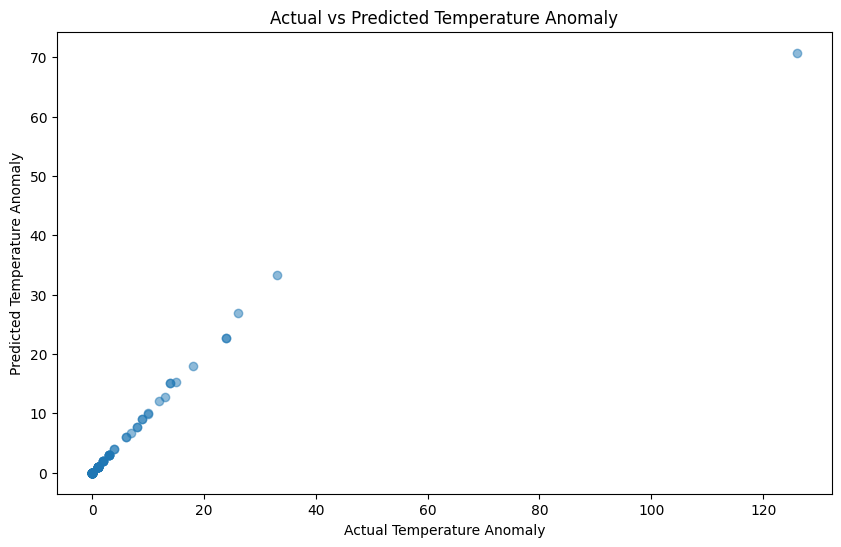

In [136]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual Temperature Anomaly')
plt.ylabel('Predicted Temperature Anomaly')
plt.title('Actual vs Predicted Temperature Anomaly')
plt.show()




In [137]:
import joblib

# After training your Random Forest model
joblib.dump(rf_model, 'model/random_forest_model.pkl')

# If you also trained a logistic regression model
joblib.dump(log_model, 'model/logistic_regression_model.pkl')


['model/logistic_regression_model.pkl']

In [138]:
# Save the scaler if you need to use it later
joblib.dump(scaler, 'model/scaler.pkl')

['model/scaler.pkl']